In [1]:
# packages

# standard
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# plot
import matplotlib.pyplot as plt
import seaborn as sns

# Present Working Directory | Get Current Working Directory
import os
pwd = os.getcwd()

# Patient Data - Import and Preparation

In [14]:
# load data
df = pd.read_csv(pwd + '\\Colorectal Cancer Patient Data.csv')
df

,Unnamed: 0,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem
0,0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0
1,1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0
2,2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0
3,3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0
4,4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
58,58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0
59,59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0
60,60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0
61,61,GSM877188,57.0,A,Male,Rectum,68.0,1.0,0.0,0.0


In [15]:
# Create copy of df

df_modified = df.copy()
df_modified

,Unnamed: 0,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem
0,0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0
1,1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0
2,2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0
3,3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0
4,4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
58,58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0
59,59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0
60,60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0
61,61,GSM877188,57.0,A,Male,Rectum,68.0,1.0,0.0,0.0


In [20]:
# remove empty rows/columns
df_modified = df_modified.drop("Unnamed: 0", axis = 1)
df_modified = df_modified.drop(index = 62, axis = 0)
df_modified

,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem
0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0
1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0
2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0
3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0
4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
57,GSM877184,54.0,C,Male,Left,22.0,1.0,0.0,0.0
58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0
59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0
60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0


In [23]:
# get structure of dataframe
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_REF           62 non-null     object 
 1   Age (in years)   62 non-null     float64
 2   Dukes Stage      62 non-null     object 
 3   Gender           62 non-null     object 
 4   Location         62 non-null     object 
 5   DFS (in months)  62 non-null     float64
 6   DFS event        62 non-null     float64
 7   Adj_Radio        62 non-null     float64
 8   Adj_Chem         62 non-null     float64
dtypes: float64(5), object(4)
memory usage: 7.3+ KB


# Patient Data - Numerical Variables

In [24]:
features_num = ['Age (in years)', 'DFS (in months)']


In [25]:
# basic stats
df_modified[features_num].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.90])

,Age (in years),DFS (in months)
count,62.000000,62.000000
mean,61.112903,41.774194
std,9.581582,26.288076
min,28.000000,4.000000
10%,49.100000,14.100000
25%,56.250000,19.500000
50%,62.000000,38.000000
75%,67.000000,57.500000
90%,72.900000,80.900000
max,78.000000,108.000000


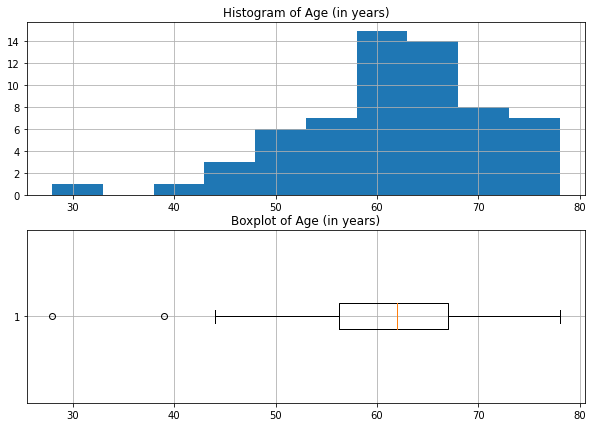

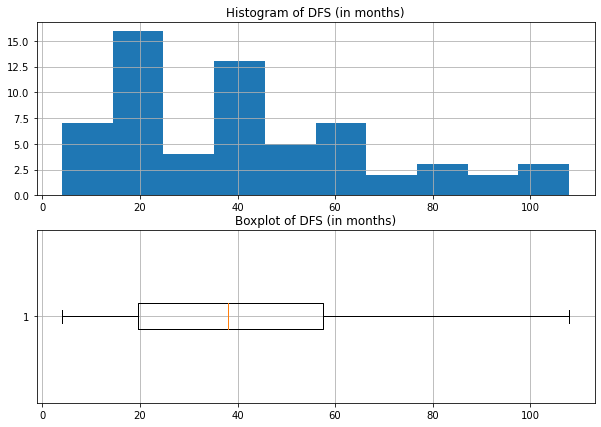

In [26]:
# plot distributions

for f in features_num:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10,7))
    
    ax1.hist(df_modified[f])
    ax1.grid()
    ax1.set_title('Histogram of ' + f)
    
    ax2.boxplot(df_modified[f], vert = False)
    ax2.grid()
    ax2.set_title('Boxplot of ' + f)
    
    plt.show()

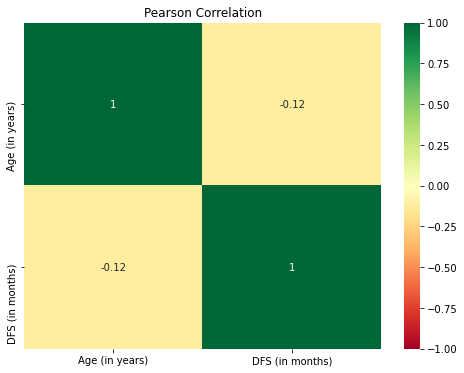

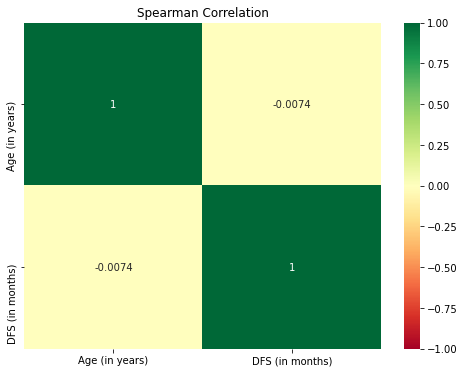

In [27]:
# correlations
corr_pearson = df_modified[features_num].corr(method = 'pearson')
corr_spearman = df_modified[features_num].corr(method = 'spearman')

fig = plt.figure(figsize = (8, 6))

sns.heatmap(corr_pearson, annot = True, cmap = 'RdYlGn', vmin = -1, vmax = +1)
plt.title('Pearson Correlation')
plt.show()

fig = plt.figure(figsize = (8, 6))
sns.heatmap(corr_spearman, annot = True, cmap = 'RdYlGn', vmin = -1, vmax =+1)
plt.title('Spearman Correlation')
plt.show()

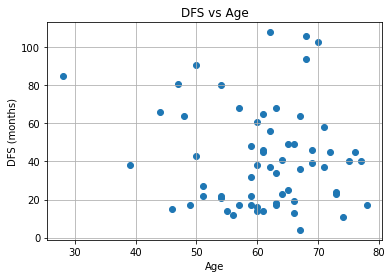

In [28]:
plt.scatter(df_modified['Age (in years)'], df_modified['DFS (in months)'])
plt.title('DFS vs Age')
plt.xlabel('Age')
plt.ylabel('DFS (months)')
plt.grid()
plt.show()

# Patient Data - Categorical Variables

In [29]:
features_cat = ['Dukes Stage', 'Gender', 'Location',
               'DFS event', 'Adj_Radio', 'Adj_Chem']

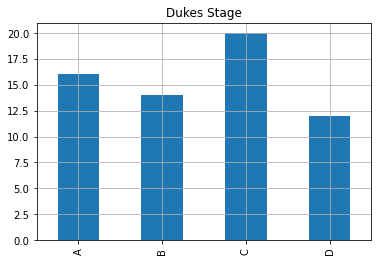

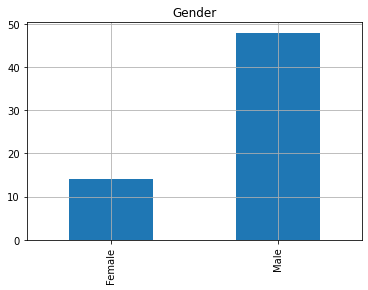

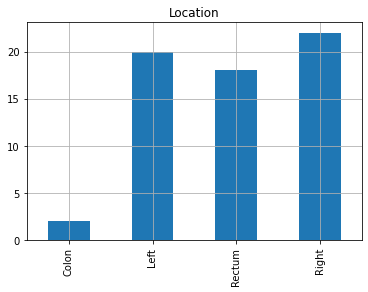

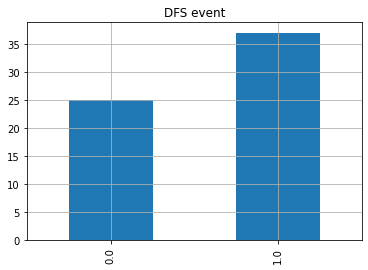

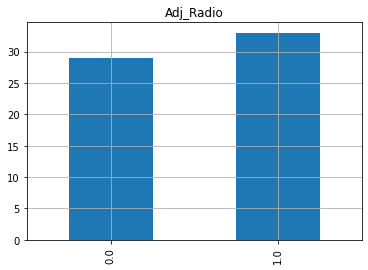

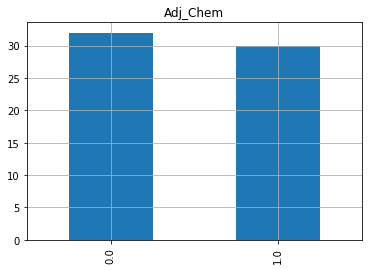

In [33]:
for f in features_cat:
    df_modified[f].value_counts().sort_index().plot(kind = 'bar')
    plt.title(f)
    plt.grid()
    plt.show()

# Gene Expression Data - Import and Preparation

In [36]:
# load data
df_gene = pd.read_csv(pwd + '\\Colorectal Cancer Gene Expression Data.csv')
df_gene.head()

,Unnamed: 0,ID_REF,GSM877126,GSM877127,GSM877128,GSM877129,GSM877130,GSM877131,GSM877132,GSM877133,...,GSM877179,GSM877180,GSM877181,GSM877182,GSM877183,GSM877184,GSM877185,GSM877186,GSM877187,GSM877188
0,0,117_at,6.029834,6.344321,5.023127,4.612727,5.865944,6.863884,5.430316,4.285183,...,5.111097,4.894901,6.660386,5.407188,7.228848,4.835558,5.694010,8.661629,5.702601,4.500368
1,1,1007_s_at,9.468893,9.994204,10.409823,10.596921,10.252547,9.671754,10.863276,9.788300,...,10.084649,10.353849,10.584126,10.585953,9.579042,10.343581,9.409749,10.427298,10.309094,10.996956
2,2,1053_at,7.187090,7.705626,7.934057,7.446374,7.141105,7.040535,7.767728,8.035921,...,6.119306,7.320403,7.326724,7.776103,8.273184,7.471584,7.488735,7.512632,7.476872,7.453162
3,3,121_at,6.807582,6.893130,7.165602,7.071417,7.103383,7.504727,7.067674,7.259019,...,7.267976,7.556417,6.950901,6.898353,7.240276,7.920227,6.699796,7.046389,7.349701,8.031972
4,4,1255_g_at,3.084591,3.118704,2.984632,2.912851,3.383726,2.772535,3.037304,2.986420,...,2.741116,3.054084,3.186402,2.881039,2.754190,2.888331,3.201511,2.650723,2.858642,2.787537


In [37]:
# Copy df to modify
gene_modified = df_gene.copy()

In [41]:
# drop unneeded column
gene_modified = gene_modified.drop('Unnamed: 0', axis = 1)
gene_modified.head()

,ID_REF,GSM877126,GSM877127,GSM877128,GSM877129,GSM877130,GSM877131,GSM877132,GSM877133,GSM877134,...,GSM877179,GSM877180,GSM877181,GSM877182,GSM877183,GSM877184,GSM877185,GSM877186,GSM877187,GSM877188
0,117_at,6.029834,6.344321,5.023127,4.612727,5.865944,6.863884,5.430316,4.285183,4.903302,...,5.111097,4.894901,6.660386,5.407188,7.228848,4.835558,5.694010,8.661629,5.702601,4.500368
1,1007_s_at,9.468893,9.994204,10.409823,10.596921,10.252547,9.671754,10.863276,9.788300,10.551750,...,10.084649,10.353849,10.584126,10.585953,9.579042,10.343581,9.409749,10.427298,10.309094,10.996956
2,1053_at,7.187090,7.705626,7.934057,7.446374,7.141105,7.040535,7.767728,8.035921,7.869727,...,6.119306,7.320403,7.326724,7.776103,8.273184,7.471584,7.488735,7.512632,7.476872,7.453162
3,121_at,6.807582,6.893130,7.165602,7.071417,7.103383,7.504727,7.067674,7.259019,7.462846,...,7.267976,7.556417,6.950901,6.898353,7.240276,7.920227,6.699796,7.046389,7.349701,8.031972
4,1255_g_at,3.084591,3.118704,2.984632,2.912851,3.383726,2.772535,3.037304,2.986420,3.066619,...,2.741116,3.054084,3.186402,2.881039,2.754190,2.888331,3.201511,2.650723,2.858642,2.787537


### Time to transpose the columns to aling with the patients' data

In [42]:
gene_modified = gene_modified.transpose()

# very results of the transposition
gene_modified.head()

,0,1,2,3,4,5,6,7,8,9,...,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934
ID_REF,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
GSM877126,6.02983,9.46889,7.18709,6.80758,3.08459,7.39701,6.52543,3.84825,7.57233,3.7482,...,3.50481,2.85611,3.13071,5.60313,3.09135,4.00969,4.3504,2.51203,7.4945,4.03098
GSM877127,6.34432,9.9942,7.70563,6.89313,3.1187,7.1638,6.39119,4.20209,8.29532,3.11434,...,3.95783,2.98864,3.48418,6.60174,3.14174,4.67973,4.50876,2.4277,8.157,2.82709
GSM877128,5.02313,10.4098,7.93406,7.1656,2.98463,7.37522,5.53885,4.07446,7.05558,4.17227,...,3.74952,2.61084,3.40621,6.0032,3.46999,4.78184,4.43505,2.5313,6.05869,2.93045
GSM877129,4.61273,10.5969,7.44637,7.07142,2.91285,7.59623,5.98915,3.73821,9.68381,3.62541,...,3.61043,2.72827,3.53487,5.85833,3.37229,3.65357,5.01499,2.60876,5.48807,2.94985
